In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-scoring/sample_submission.csv
/kaggle/input/sf-scoring/train.csv
/kaggle/input/sf-scoring/test.csv


In [2]:
DATA_DIR = '/kaggle/input/sf-scoring/'
#DATA_DIR = '.' #Для локальной работы
df_train = pd.read_csv(DATA_DIR +'/train.csv')
df_test = pd.read_csv(DATA_DIR +'/test.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [3]:
sample_submission.shape

(36349, 2)

In [4]:
df_test.shape

(36349, 18)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [6]:
df_train.head(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


In [7]:
df_test.info

<bound method DataFrame.info of        client_id   app_date education sex  age car car_type  decline_app_cnt  \
0          74835  22MAR2014       GRD   M   29   Y        Y                0   
1          17527  24JAN2014       SCH   F   39   N        N                5   
2          75683  23MAR2014       UGR   M   50   Y        Y                0   
3          26883  03FEB2014       SCH   M   56   N        N                0   
4          28862  04FEB2014       GRD   F   38   N        N                0   
...          ...        ...       ...  ..  ...  ..      ...              ...   
36344      83775  31MAR2014       SCH   F   37   N        N                1   
36345     106254  25APR2014       GRD   F   64   Y        Y                0   
36346      81852  30MAR2014       GRD   M   31   N        N                2   
36347       1971  07JAN2014       UGR   F   27   N        N                1   
36348      69044  17MAR2014       SCH   M   38   N        N                0   

       

In [8]:
sample_submission.head(5)

,client_id,default
0,74835,0
1,17527,0
2,75683,0
3,26883,0
4,28862,0


In [9]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  36349 non-null  int64
 1   default    36349 non-null  int64
dtypes: int64(2)
memory usage: 568.1 KB


In [10]:

df_train['sample'] = 1 
df_test['sample'] = 0  
df_test['default'] = 0 

data = df_test.append(df_train, sort=False).reset_index(drop=True) 

In [11]:
data.nunique(dropna=False)

client_id           110148
app_date               120
education                6
sex                      2
age                     52
car                      2
car_type                 2
decline_app_cnt         24
good_work                2
score_bki           102618
bki_request_cnt         40
region_rating            7
home_address             3
work_address             3
income                1207
sna                      4
first_time               4
foreign_passport         2
sample                   2
default                  2
dtype: int64

In [12]:
num_cols = ['age', 'score_bki', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'income']
cat_cols = ['education', 'first_time', 'sna', 'work_address', 'home_address', 'region_rating']
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

<AxesSubplot:>

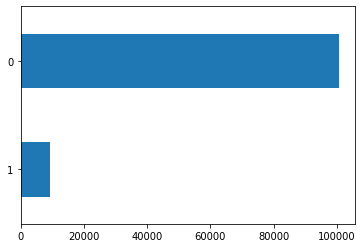

In [13]:
data['default'].value_counts(ascending=True).plot(kind='barh')

In [14]:
data.drop(['client_id','app_date',], axis = 1, inplace=True)

In [15]:
data = pd.get_dummies(data, columns=['education'], dummy_na=True)

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for column in bin_cols:
    data[column] = le.fit_transform(data[column])
    
columns = ['first_time', 'sna', 'work_address', 'home_address', 'region_rating']

for column in columns:
    data[column] = le.fit_transform(data[column])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               110148 non-null  int64  
 1   age               110148 non-null  int64  
 2   car               110148 non-null  int64  
 3   car_type          110148 non-null  int64  
 4   decline_app_cnt   110148 non-null  int64  
 5   good_work         110148 non-null  int64  
 6   score_bki         110148 non-null  float64
 7   bki_request_cnt   110148 non-null  int64  
 8   region_rating     110148 non-null  int64  
 9   home_address      110148 non-null  int64  
 10  work_address      110148 non-null  int64  
 11  income            110148 non-null  int64  
 12  sna               110148 non-null  int64  
 13  first_time        110148 non-null  int64  
 14  foreign_passport  110148 non-null  int64  
 15  sample            110148 non-null  int64  
 16  default           11

In [18]:
data

,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,...,first_time,foreign_passport,sample,default,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,education_nan
0,1,29,1,1,0,0,-2.271884,3,3,0,...,3,0,0,0,0,1,0,0,0,0
1,0,39,0,0,5,0,-1.504999,2,3,0,...,2,0,0,0,0,0,0,1,0,0
2,1,50,1,1,0,0,-1.691339,1,3,0,...,2,1,0,0,0,0,0,0,1,0
3,1,56,0,0,0,0,-2.374182,1,2,0,...,2,0,0,0,0,0,0,1,0,0
4,0,38,0,0,0,0,-2.487502,0,6,1,...,2,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110143,0,45,0,0,0,0,-1.792064,3,3,0,...,3,0,1,0,0,1,0,0,0,0
110144,1,41,1,1,0,0,-2.058029,1,3,1,...,3,0,1,0,0,0,0,1,0,0
110145,1,31,0,0,0,0,-1.512635,4,6,1,...,1,0,1,0,0,0,0,1,0,0
110146,0,29,0,0,0,1,-1.479334,3,3,0,...,2,0,1,1,0,0,0,1,0,0


In [19]:
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample', 'default'], axis=1)

y = train_data['default'].values
X = train_data.drop(['default'], axis=1)

In [20]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((59039, 21), (14760, 21), (59039,), (14760,))

In [22]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 

In [23]:
logreg = LogisticRegression(solver='liblinear', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [24]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     12933
           1       0.50      0.00      0.00      1827

    accuracy                           0.88     14760
   macro avg       0.69      0.50      0.47     14760
weighted avg       0.83      0.88      0.82     14760



In [25]:
logreg_final = LogisticRegression(solver='liblinear', max_iter=1000)
logreg_final.fit(X, y)

LogisticRegression(max_iter=1000, solver='liblinear')

In [26]:
predict_submission = logreg_final.predict(test_data)

In [27]:
sample_submission['default'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,client_id,default
0,74835,0
1,17527,0
2,75683,0
3,26883,0
4,28862,0
5,99881,0
6,26630,0
7,79934,0
8,16605,0
9,105449,0


In [28]:
sample_submission.describe()

,client_id,default
count,36349.000000,36349.00000
mean,54945.647473,0.00011
std,31706.052195,0.01049
min,4.000000,0.00000
25%,27744.000000,0.00000
50%,54657.000000,0.00000
75%,82322.000000,0.00000
max,110148.000000,1.00000
